# Modelos ARCH y GARCH

In [2]:
options(warn=-1) #suppress warnings globally in an R Script
library(fGarch)
library(aTSA)
library(forecast)

## Especificación, simulación y estimación de modelos ARCH y GARCH por medio de dos librerías diferentes

# ARCH(2)

Especificar el modelo 

Simulación de la serie

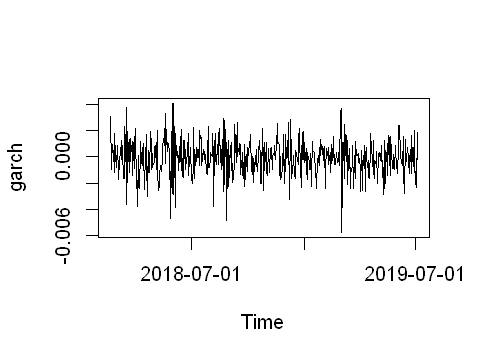

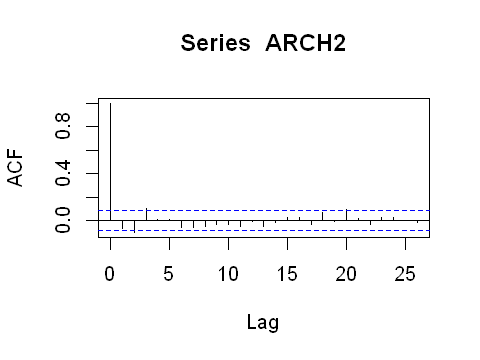

In [52]:
set.seed(12)
spec = garchSpec(model = list(alpha = c(0.2, 0.4), beta = 0))
ARCH2=garchSim(spec, n = 500)
options(repr.plot.width=4, repr.plot.height=3) 
plot(ARCH2)
acf(ARCH2)

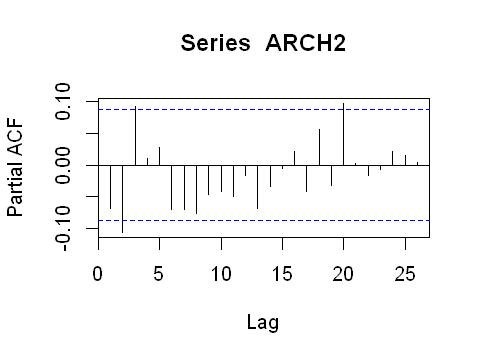

In [53]:
pacf(ARCH2)

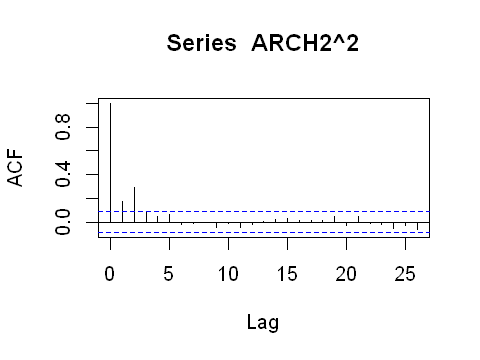

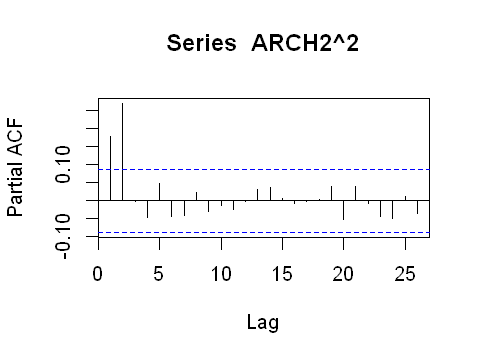

In [51]:
acf(ARCH2^2)
pacf(ARCH2^2)

In [5]:
Box.test(ARCH2^2,lag=20,type='Ljung-Box') #Rechazo que No hay autocorrelación presente  en la serie
salidaarima=arima(ARCH2,order = c(3,0,0),include.mean = FALSE,fixed=c(0,NA,NA)) # fixed=c(0,NA,NA) el ar1 no es significativo
library(lmtest)
coeftest(salidaarima)
salidaarima


	Box-Ljung test

data:  ARCH2^2
X-squared = 71.733, df = 20, p-value = 9.469e-08



z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)  
ar2 -0.093046   0.044700 -2.0816  0.03738 *
ar3  0.104951   0.044655  2.3502  0.01876 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Call:
arima(x = ARCH2, order = c(3, 0, 0), include.mean = FALSE, fixed = c(0, NA, 
    NA))

Coefficients:
      ar1      ar2     ar3
        0  -0.0930  0.1050
s.e.    0   0.0447  0.0447

sigma^2 estimated as 1.855e-06:  log likelihood = 2589.9,  aic = -5173.8

## Pruebas Portmanteau

Efectos ARCH

ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order   PQ  p.value
[1,]     4 43.7 7.42e-09
[2,]     8 45.3 3.26e-07
[3,]    12 47.5 3.77e-06
[4,]    16 48.2 4.42e-05
[5,]    20 52.6 9.27e-05
[6,]    24 56.1 2.19e-04
Lagrange-Multiplier test: 
     order    LM  p.value
[1,]     4 161.6 0.00e+00
[2,]     8  77.4 4.72e-14
[3,]    12  49.6 7.29e-07
[4,]    16  36.4 1.54e-03
[5,]    20  27.7 8.96e-02
[6,]    24  22.2 5.08e-01


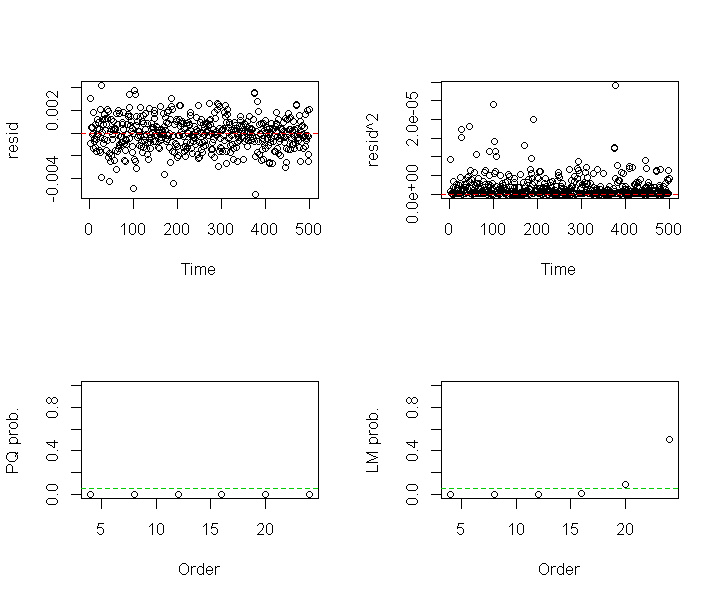

In [6]:
options(repr.plot.width=6, repr.plot.height=5)
arch.test(salidaarima)
resarma=residuals(salidaarima)^2

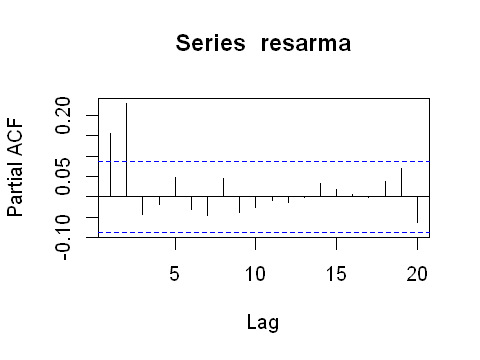

In [7]:
options(repr.plot.width=4, repr.plot.height=3)
pacf(resarma,lag.max = 20)

## Ajuste de la serie

In [8]:
m1=garchFit(garch~arma(3,0)+garch(2,0),data=ARCH2,trace=F,include.mean = FALSE)
m1


Title:
 GARCH Modelling 

Call:
 garchFit(formula = garch ~ arma(3, 0) + garch(2, 0), data = ARCH2, 
    include.mean = FALSE, trace = F) 

Mean and Variance Equation:
 data ~ arma(3, 0) + garch(2, 0)
<environment: 0x0000000035fd7a30>
 [data = ARCH2]

Conditional Distribution:
 norm 

Coefficient(s):
        ar1          ar2          ar3        omega       alpha1       alpha2  
-1.2976e-02  -2.1306e-02   4.9982e-02   9.9589e-07   1.3040e-01   3.4684e-01  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)    
ar1    -1.298e-02   4.457e-02   -0.291   0.7710    
ar2    -2.131e-02   4.723e-02   -0.451   0.6519    
ar3     4.998e-02   4.093e-02    1.221   0.2221    
omega   9.959e-07   1.178e-07    8.452  < 2e-16 ***
alpha1  1.304e-01   5.229e-02    2.494   0.0126 *  
alpha2  3.468e-01   7.901e-02    4.390 1.14e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 2618.65    normalized:  5.2373 

Descrip

Como los parámteros del modelo ARMA(3,0) no resultan ser significativos, debido posiblemente a que la estrucutra de correlación es débil, entonces se procede de la siguiente manera:

In [9]:
m=garchFit(garch~arma(0,0)+garch(2,0),data=ARCH2,trace=F,include.mean = FALSE)
m


Title:
 GARCH Modelling 

Call:
 garchFit(formula = garch ~ arma(0, 0) + garch(2, 0), data = ARCH2, 
    include.mean = FALSE, trace = F) 

Mean and Variance Equation:
 data ~ arma(0, 0) + garch(2, 0)
<environment: 0x0000000034d12b90>
 [data = ARCH2]

Conditional Distribution:
 norm 

Coefficient(s):
     omega      alpha1      alpha2  
9.8967e-07  1.3911e-01  3.5788e-01  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
omega  9.897e-07   1.187e-07    8.336  < 2e-16 ***
alpha1 1.391e-01   5.484e-02    2.536   0.0112 *  
alpha2 3.579e-01   7.996e-02    4.475 7.63e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 2614.238    normalized:  5.228476 

Description:
 Thu Jul 04 23:51:38 2019 by user: FM 


# ARCH(1)

Omega es el coeficiente constante de la ecuación de varianza

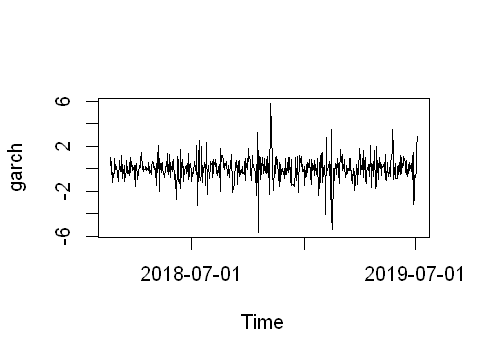

In [55]:
set.seed(100)
spec = garchSpec(model = list(omega=0.5,alpha = c(0.5), beta = 0))
ARCH1=garchSim(spec, n = 500,extended=F)
plot(ARCH1)

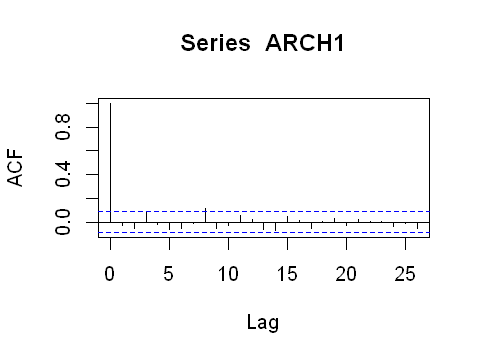

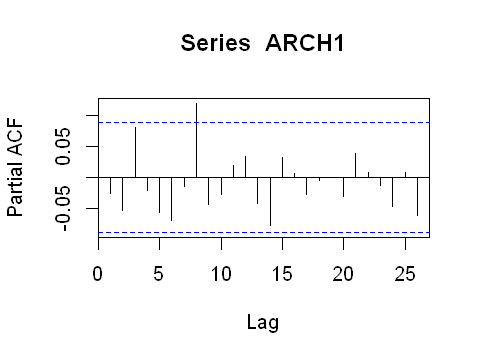

In [56]:
acf(ARCH1)
pacf(ARCH1)

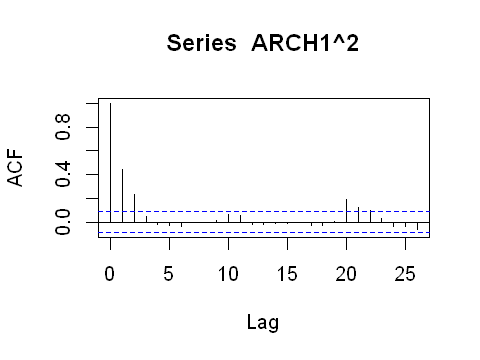

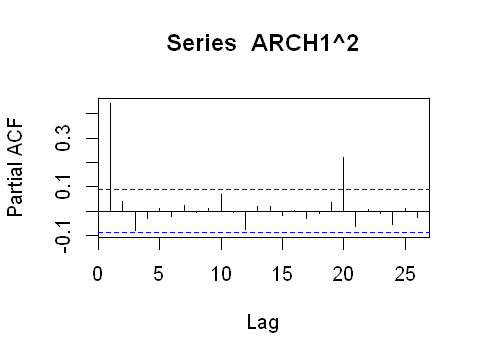

In [57]:
acf(ARCH1^2)
pacf(ARCH1^2)

ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order  PQ p.value
[1,]     4 125       0
[2,]     8 126       0
[3,]    12 130       0
[4,]    16 130       0
[5,]    20 149       0
[6,]    24 162       0
Lagrange-Multiplier test: 
     order    LM  p.value
[1,]     4 224.4 0.00e+00
[2,]     8 109.6 0.00e+00
[3,]    12  70.5 9.93e-11
[4,]    16  50.6 9.57e-06
[5,]    20  39.5 3.84e-03
[6,]    24  26.9 2.61e-01


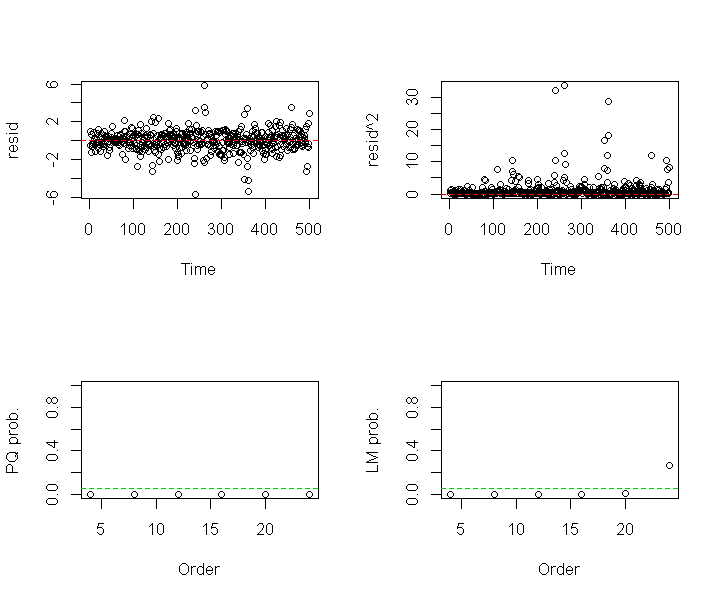

In [12]:
salidaarima=arima(ARCH1,order = c(0,0,0),include.mean = FALSE)
options(repr.plot.width=6, repr.plot.height=5)
arch.test(salidaarima)

## Ajuste de la serie


Title:
 GARCH Modelling 

Call:
 garchFit(formula = garch ~ arma(1, 0) + garch(1, 1), data = ARCH1, 
    include.mean = FALSE, trace = F) 

Mean and Variance Equation:
 data ~ arma(1, 0) + garch(1, 1)
<environment: 0x000000003635a7b8>
 [data = ARCH1]

Conditional Distribution:
 norm 

Coefficient(s):
        ar1        omega       alpha1        beta1  
-0.01889935   0.46373868   0.62187234   0.00000001  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)    
ar1    -1.890e-02   3.019e-02   -0.626    0.531    
omega   4.637e-01   3.814e-02   12.159  < 2e-16 ***
alpha1  6.219e-01   8.640e-02    7.197 6.14e-13 ***
beta1   1.000e-08          NA       NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -665.4806    normalized:  -1.330961 

Description:
 Thu Jul 04 23:52:19 2019 by user: FM 


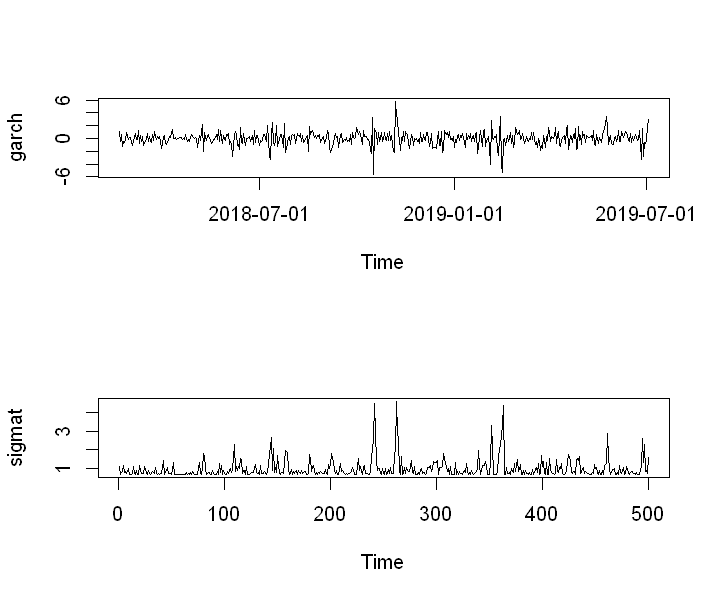

In [13]:
m1=garchFit(garch~arma(1,0)+garch(1,1),data=ARCH1,trace=F,include.mean = FALSE)
m1
sigmat=as.ts(m1@sigma.t)
options(repr.plot.width=6, repr.plot.height=5)
par(mfrow=c(2,1))
plot(ARCH1)
plot(sigmat)

meanForecast,meanError,standardDeviation,lowerInterval,upperInterval
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-5.454663e-02,2.402236,2.402236,-4.762842,4.653749
1.030896e-03,2.013569,2.013057,-3.945492,3.947554
-1.948325e-05,1.727791,1.727372,-3.386428,3.386389
3.682207e-07,1.523272,1.522922,-2.985557,2.985558
-6.959130e-09,1.380895,1.380594,-2.706504,2.706504


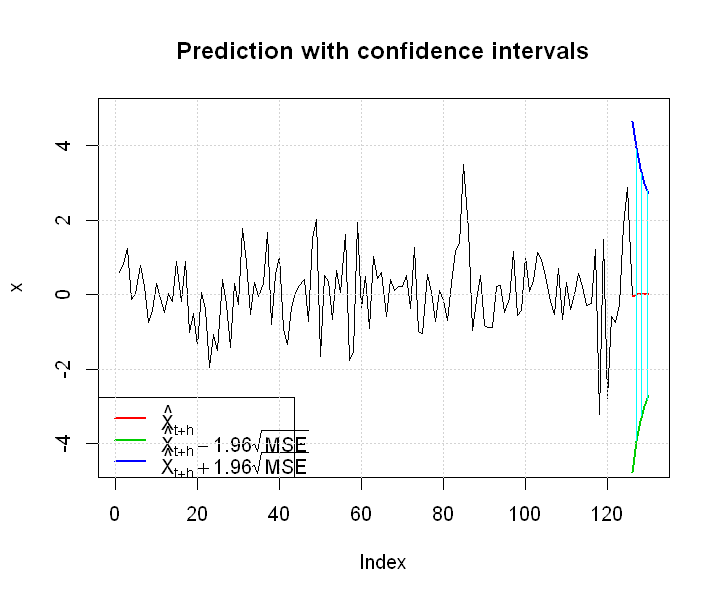

In [14]:
prediccion=predict(n.ahead=5,m1)
predict(n.ahead=5,m1,plot=TRUE)

# Ajuste Serie datos reales

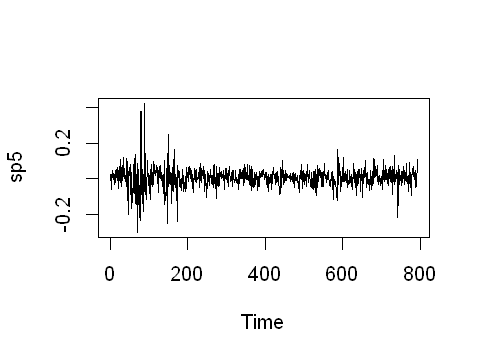

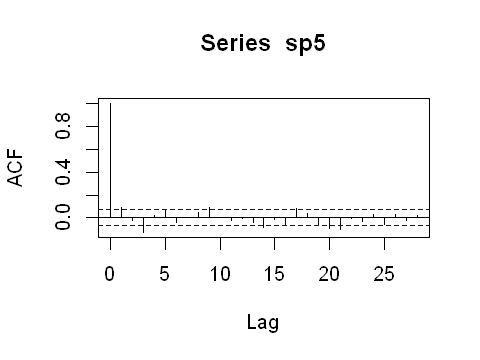

In [17]:
sp5=as.ts(scan(file='C:/Users/FAMILIA MORENO/Documents/R/FMwd/SP500.txt'))
options(repr.plot.width=4, repr.plot.height=3)
plot(sp5)
acf(sp5)

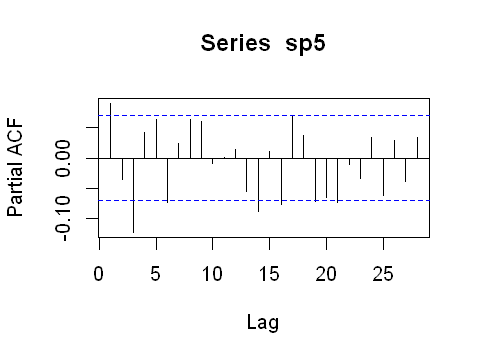

In [19]:
pacf(sp5) 

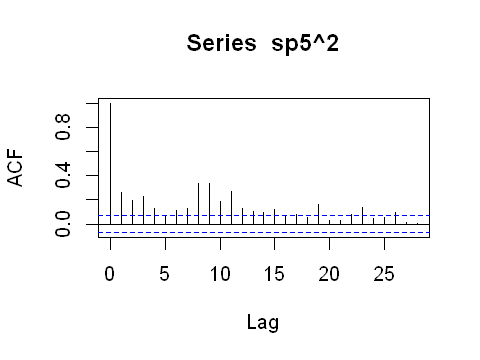

In [20]:
acf(sp5^2)

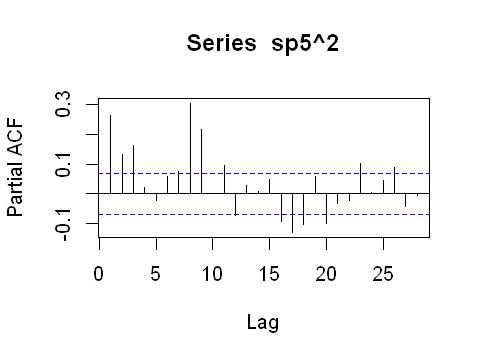

In [21]:
pacf(sp5^2)


z test of coefficients:

            Estimate Std. Error z value Pr(>|z|)    
ar1       -0.1702494  0.1587912 -1.0722 0.283649    
ar2       -0.6008847  0.1151817 -5.2168 1.82e-07 ***
ma1        0.2657245  0.1608483  1.6520 0.098531 .  
ma2        0.6261631  0.1301805  4.8100 1.51e-06 ***
ma3       -0.0804203  0.0473898 -1.6970 0.089698 .  
intercept  0.0061580  0.0020829  2.9565 0.003112 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



z test of coefficients:

            Estimate Std. Error z value  Pr(>|z|)    
ar1       -0.3615738  0.1201389 -3.0096  0.002616 ** 
ar2       -0.7183591  0.0804205 -8.9325 < 2.2e-16 ***
ma1        0.4832025  0.1031864  4.6828  2.83e-06 ***
ma2        0.7970222  0.0788931 10.1026 < 2.2e-16 ***
intercept  0.0061644  0.0022354  2.7576  0.005822 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order  PQ p.value
[1,]     4 118       0
[2,]     8 226       0
[3,]    12 393       0
[4,]    16 436       0
[5,]    20 470       0
[6,]    24 496       0
Lagrange-Multiplier test: 
     order    LM  p.value
[1,]     4 796.3 0.00e+00
[2,]     8 365.1 0.00e+00
[3,]    12 140.6 0.00e+00
[4,]    16 102.7 4.00e-15
[5,]    20  75.4 1.15e-08
[6,]    24  56.4 1.25e-04


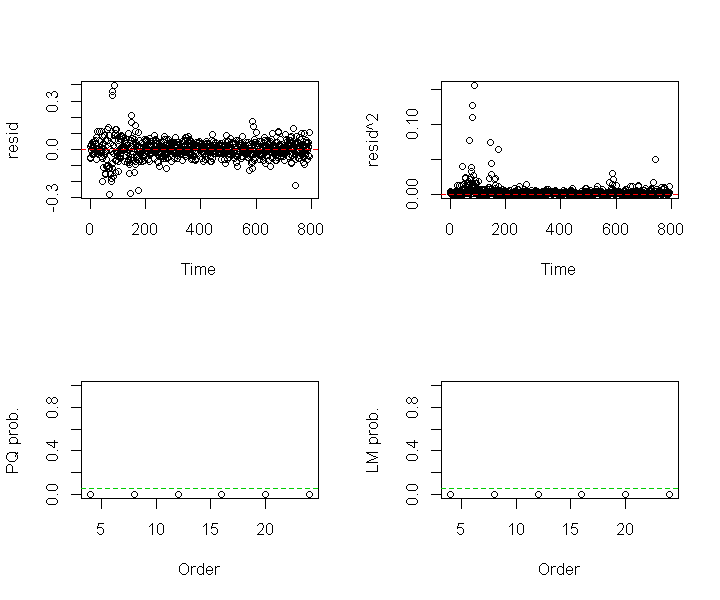

In [22]:
coeftest(auto.arima(sp5)) ####Se podría ajustar un ARMA(2,3) con constante
modeloarima=arima(sp5,order = c(2,0,2),include.mean = TRUE)
coeftest(modeloarima)
options(repr.plot.width=6, repr.plot.height=5)
arch.test(modeloarima)

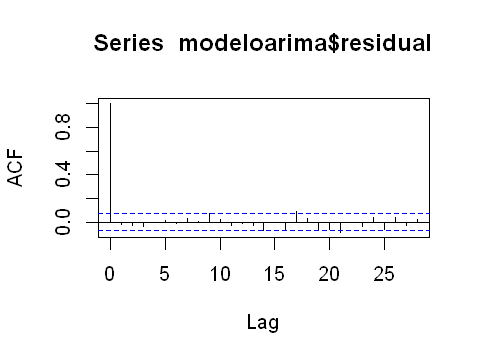

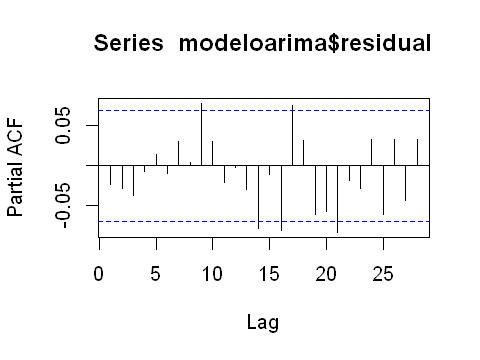

In [24]:
options(repr.plot.width=4, repr.plot.height=3)
acf(modeloarima$residual)
pacf(modeloarima$residual)

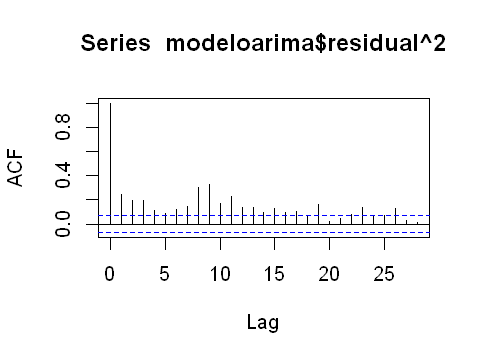

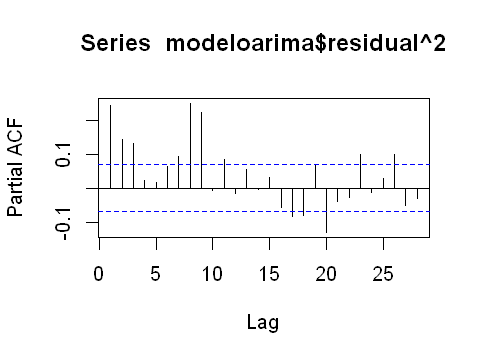

In [25]:
acf(modeloarima$residual^2)
pacf(modeloarima$residual^2)

In [26]:
modelosp5_1=garchFit(~arma(2,2)+garch(1,1),data=sp5,trace=F,include.mean=T)
summary(modelosp5_1)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~arma(2, 2) + garch(1, 1), data = sp5, include.mean = T, 
    trace = F) 

Mean and Variance Equation:
 data ~ arma(2, 2) + garch(1, 1)
<environment: 0x000000003648a950>
 [data = sp5]

Conditional Distribution:
 norm 

Coefficient(s):
         mu          ar1          ar2          ma1          ma2        omega  
 1.4173e-02  -1.1856e-01  -7.9138e-01   1.7198e-01   7.6272e-01   7.7978e-05  
     alpha1        beta1  
 1.1961e-01   8.5716e-01  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)    
mu      1.417e-02   3.156e-03    4.491 7.10e-06 ***
ar1    -1.186e-01   1.188e-01   -0.998  0.31810    
ar2    -7.914e-01   1.101e-01   -7.188 6.59e-13 ***
ma1     1.720e-01   1.316e-01    1.307  0.19114    
ma2     7.627e-01   1.142e-01    6.678 2.42e-11 ***
omega   7.798e-05   2.755e-05    2.830  0.00465 ** 
alpha1  1.196e-01   2.176e-02    5.497 3.87e-08 ***
beta1   8.572e-01   2.151e-02   39

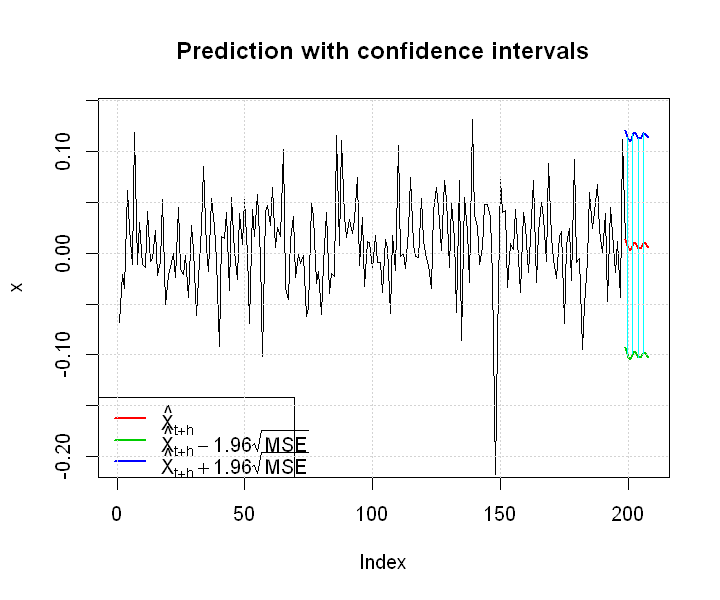

In [27]:
#plot(modelosp5_1) #Error in menu(...): menu() cannot be used non-interactively
options(repr.plot.width=6, repr.plot.height=5)
prediccion=predict(modelosp5_1,n.ahead=10, plot=TRUE) 

## library(rugarch)

Especificación del modelo

In [29]:
options(warn=-1) #suppress warnings globally in an R Script
library(rugarch)
spec1=ugarchspec(variance.model=list(model="sGARCH",garchOrder = c(3,0)),
                 mean.model=list(armaOrder=c(9,0),include.mean = TRUE),distribution.model = "norm",fixed.pars = list(ar1=0,ar2=0,ar3=0,ar4=0,
                                                                                                  alpha1=0))
fit1=ugarchfit(data=sp5,spec=spec1)
show(fit1)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(3,0)
Mean Model	: ARFIMA(9,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.006255    0.001723  3.63072 0.000283
ar1     0.000000          NA       NA       NA
ar2     0.000000          NA       NA       NA
ar3     0.000000          NA       NA       NA
ar4     0.000000          NA       NA       NA
ar5     0.114629    0.033005  3.47307 0.000515
ar6    -0.129269    0.031139 -4.15140 0.000033
ar7     0.078756    0.027615  2.85191 0.004346
ar8    -0.011031    0.029033 -0.37994 0.703987
ar9     0.045569    0.030248  1.50649 0.131940
omega   0.001226    0.000121 10.12574 0.000000
alpha1  0.000000          NA       NA       NA
alpha2  0.265654    0.056266  4.72138 0.000002
alpha3  0.446243    0.076769  5.8

# Modelos GARCH

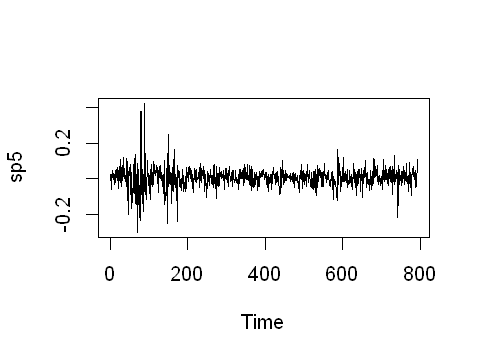

In [31]:
options(repr.plot.width=4, repr.plot.height=3)
plot(sp5,type='l')

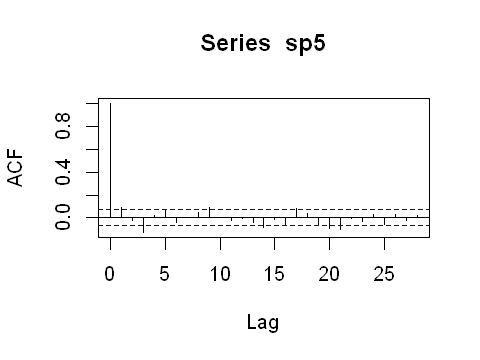

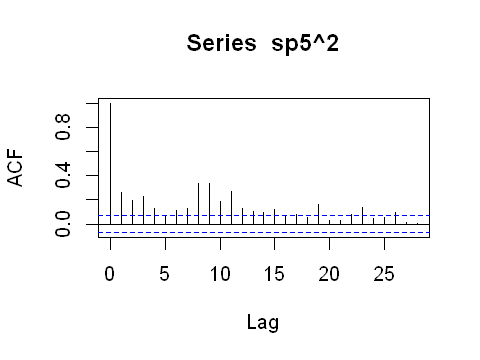

In [32]:
acf(sp5)
acf(sp5^2)

ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order  PQ p.value
[1,]     4 123       0
[2,]     8 237       0
[3,]    12 420       0
[4,]    16 462       0
[5,]    20 506       0
[6,]    24 535       0
Lagrange-Multiplier test: 
     order    LM  p.value
[1,]     4 794.1 0.00e+00
[2,]     8 348.2 0.00e+00
[3,]    12 132.6 0.00e+00
[4,]    16  98.0 3.10e-14
[5,]    20  70.1 8.72e-08
[6,]    24  51.5 5.78e-04


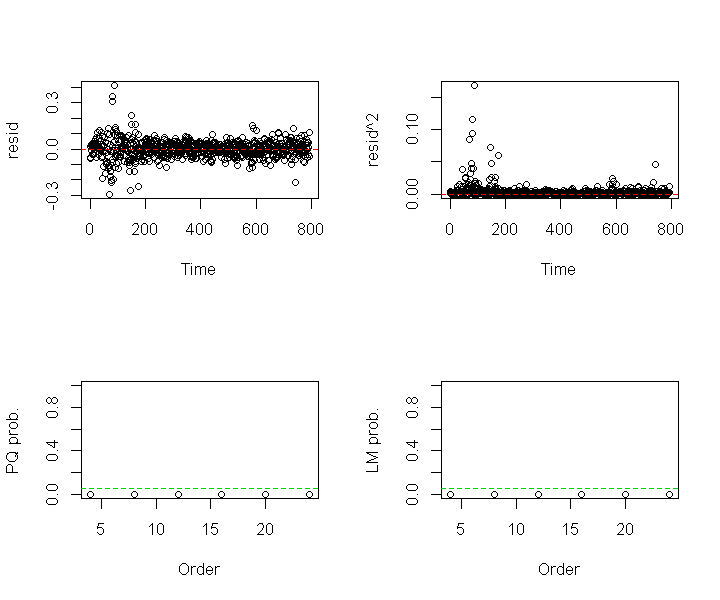

In [34]:
modeloarima=arima(sp5,order = c(3,0,0),include.mean = TRUE)
options(repr.plot.width=6, repr.plot.height=5)
arch.test(modeloarima)

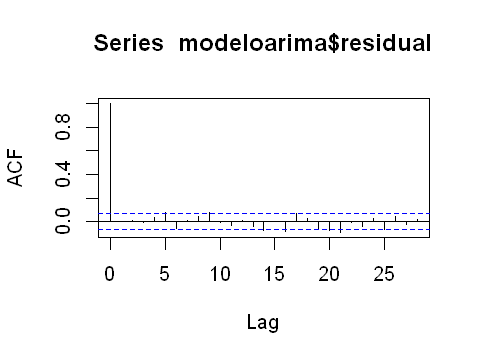

In [36]:
options(repr.plot.width=4, repr.plot.height=3)
acf(modeloarima$residual)

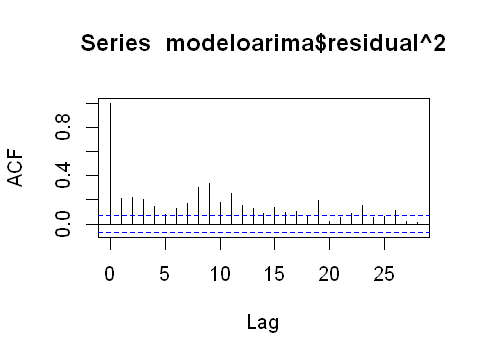

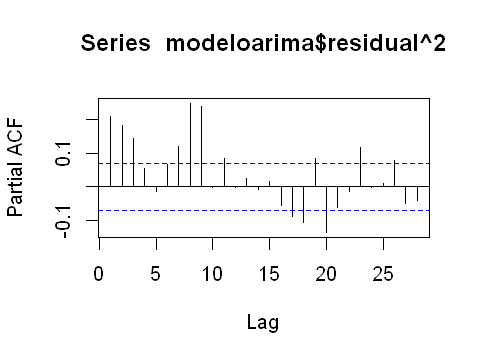

In [37]:
acf(modeloarima$residual^2)
pacf(modeloarima$residual^2)

In [38]:
modelosp5=garchFit(~arma(3,0)+garch(3,0),data=sp5,trace=F)
summary(modelosp5) ####Se puede verificar que el modelo para la parte autoregresiva no es significativa, adicional
                   ####a que la distribuci?n de los errores parece ser no normal


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~arma(3, 0) + garch(3, 0), data = sp5, trace = F) 

Mean and Variance Equation:
 data ~ arma(3, 0) + garch(3, 0)
<environment: 0x000000000f5935e8>
 [data = sp5]

Conditional Distribution:
 norm 

Coefficient(s):
         mu          ar1          ar2          ar3        omega       alpha1  
 0.00730994  -0.00014379  -0.02426410  -0.00299617   0.00138352   0.09536209  
     alpha2       alpha3  
 0.20305803   0.29206912  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)    
mu      0.0073099   0.0018108    4.037 5.41e-05 ***
ar1    -0.0001438   0.0381864   -0.004   0.9970    
ar2    -0.0242641   0.0418547   -0.580   0.5621    
ar3    -0.0029962   0.0378121   -0.079   0.9368    
omega   0.0013835   0.0001290   10.729  < 2e-16 ***
alpha1  0.0953621   0.0375827    2.537   0.0112 *  
alpha2  0.2030580   0.0470303    4.318 1.58e-05 ***
alpha3  0.2920691   0.0684937    4.264 2.01e-05 ***
---
S

In [39]:
modelosp5_1=garchFit(~arma(0,0)+garch(3,0),data=sp5,trace=F)
summary(modelosp5_1)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~arma(0, 0) + garch(3, 0), data = sp5, trace = F) 

Mean and Variance Equation:
 data ~ arma(0, 0) + garch(3, 0)
<environment: 0x0000000034f64a98>
 [data = sp5]

Conditional Distribution:
 norm 

Coefficient(s):
       mu      omega     alpha1     alpha2     alpha3  
0.0068361  0.0013956  0.0953065  0.2041645  0.2860775  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu     0.0068361   0.0016692    4.096 4.21e-05 ***
omega  0.0013956   0.0001287   10.845  < 2e-16 ***
alpha1 0.0953065   0.0373768    2.550   0.0108 *  
alpha2 0.2041645   0.0473743    4.310 1.64e-05 ***
alpha3 0.2860775   0.0666554    4.292 1.77e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 1234.774    normalized:  1.559059 

Description:
 Thu Jul 04 23:56:28 2019 by user: FM 


Standardised Residuals Tests:
                                Statistic p-Value     
 Jarque

In [40]:
modelosp5_2=garchFit(~arma(0,0)+garch(9,0),data=sp5,trace=F)
summary(modelosp5_2)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~arma(0, 0) + garch(9, 0), data = sp5, trace = F) 

Mean and Variance Equation:
 data ~ arma(0, 0) + garch(9, 0)
<environment: 0x00000000096a9ab8>
 [data = sp5]

Conditional Distribution:
 norm 

Coefficient(s):
        mu       omega      alpha1      alpha2      alpha3      alpha4  
0.00747163  0.00062594  0.08478739  0.07522581  0.19552126  0.08265892  
    alpha5      alpha6      alpha7      alpha8      alpha9  
0.02798782  0.08541249  0.01461631  0.10498026  0.14089514  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu     0.0074716   0.0015273    4.892 9.97e-07 ***
omega  0.0006259   0.0001410    4.440 8.99e-06 ***
alpha1 0.0847874   0.0407145    2.082 0.037298 *  
alpha2 0.0752258   0.0475617    1.582 0.113730    
alpha3 0.1955213   0.0580274    3.369 0.000753 ***
alpha4 0.0826589   0.0521011    1.587 0.112623    
alpha5 0.0279878   0.0437645    0.640 0.522492    
alpha6 0.

In [41]:
modelosp5_2=garchFit(~arma(0,0)+garch(9,0),data=sp5,trace=F,cond.dist ='std')
summary(modelosp5_2)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~arma(0, 0) + garch(9, 0), data = sp5, cond.dist = "std", 
    trace = F) 

Mean and Variance Equation:
 data ~ arma(0, 0) + garch(9, 0)
<environment: 0x00000000073818e8>
 [data = sp5]

Conditional Distribution:
 std 

Coefficient(s):
        mu       omega      alpha1      alpha2      alpha3      alpha4  
0.00826424  0.00077578  0.10031598  0.06241962  0.19178188  0.03574679  
    alpha5      alpha6      alpha7      alpha8      alpha9       shape  
0.03209774  0.09571942  0.00045413  0.08965974  0.12656763  8.34407754  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu     0.0082642   0.0015197    5.438 5.39e-08 ***
omega  0.0007758   0.0001693    4.581 4.63e-06 ***
alpha1 0.1003160   0.0482856    2.078 0.037751 *  
alpha2 0.0624196   0.0477649    1.307 0.191278    
alpha3 0.1917819   0.0661088    2.901 0.003720 ** 
alpha4 0.0357468   0.0569703    0.627 0.530355    
alpha5 0.0320

# Simulación

## GARCH(1,1)

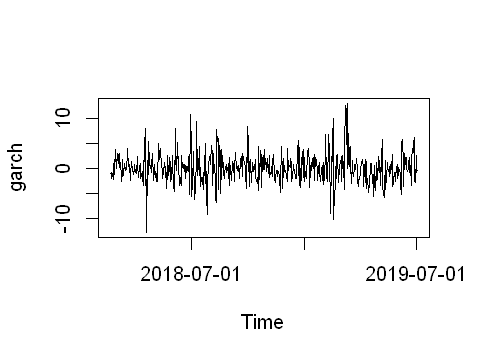

In [43]:
spec = garchSpec(model = list(omega=1.5,alpha = c(0.6), beta = c(0.3)))
GARCH11=garchSim(spec, n = 500)
plot(GARCH11)

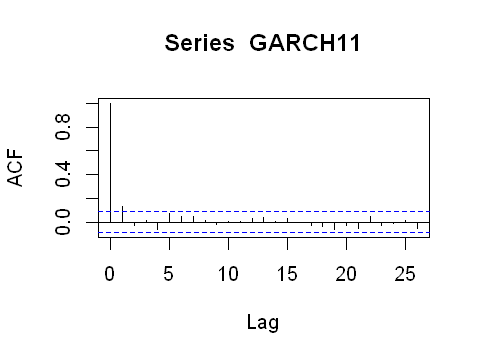

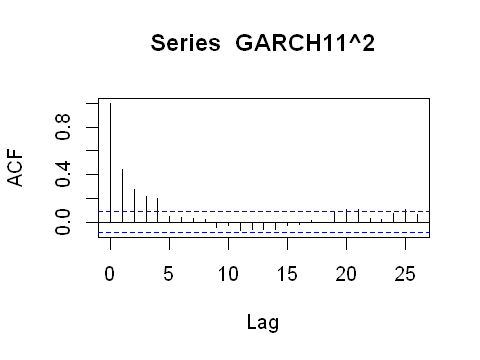

In [44]:
acf(GARCH11)
acf(GARCH11^2)

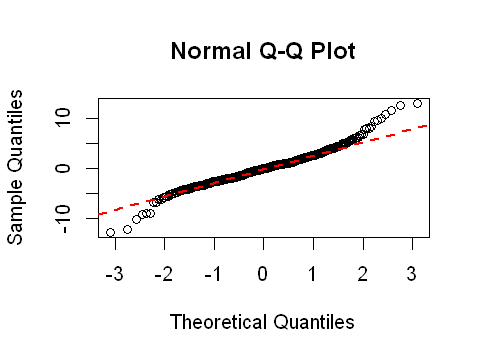

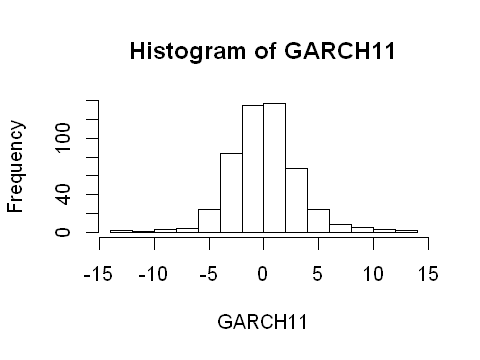

In [45]:
qqnorm(GARCH11)
qqline(GARCH11, col = 2,lwd=2,lty=2)
hist(GARCH11)

In [46]:
estimacion=garchFit(garch~garch(1,1),data=GARCH11,trace=F,include.mean=FALSE)
summary(estimacion)
#plot(estimacion) #Error in menu(...): menu() cannot be used non-interactively


Title:
 GARCH Modelling 

Call:
 garchFit(formula = garch ~ garch(1, 1), data = GARCH11, include.mean = FALSE, 
    trace = F) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x0000000006c50938>
 [data = GARCH11]

Conditional Distribution:
 norm 

Coefficient(s):
  omega   alpha1    beta1  
1.41482  0.57428  0.33097  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
omega    1.41482     0.29061    4.868 1.13e-06 ***
alpha1   0.57428     0.08814    6.516 7.23e-11 ***
beta1    0.33097     0.05776    5.730 1.00e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -1190.812    normalized:  -2.381624 

Description:
 Thu Jul 04 23:57:16 2019 by user: FM 


Standardised Residuals Tests:
                                Statistic p-Value  
 Jarque-Bera Test   R    Chi^2  3.88263   0.1435151
 Shapiro-Wilk Test  R    W      0.9953514 0.141249 
 Ljung-Box Test     R    Q(10)  6.348351  0.78

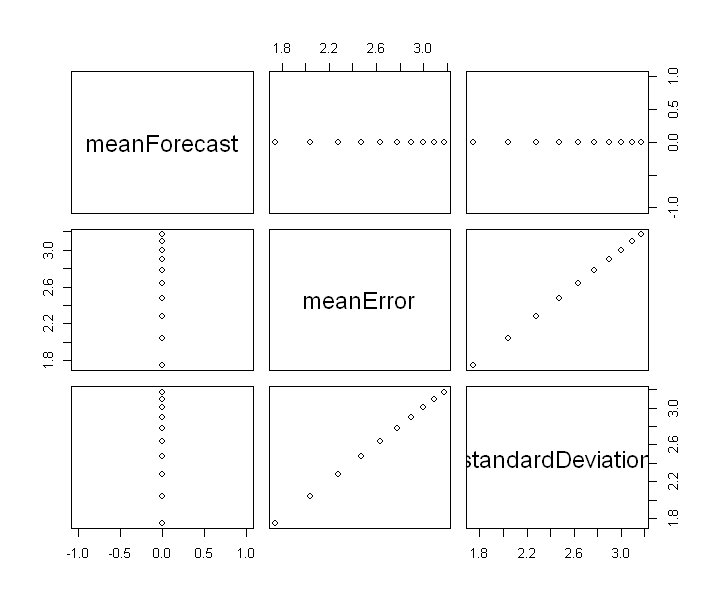

In [47]:
prediccion=predict(estimacion,n.ahead=10)
options(repr.plot.width=6, repr.plot.height=5)
plot(prediccion)

## Aplicación con datos reales

Retornar al conjunto de datos original SP5

In [48]:
modelosp5_3=garchFit(~arma(0,0)+garch(1,1),data=sp5,trace=F)
summary(modelosp5_3)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~arma(0, 0) + garch(1, 1), data = sp5, trace = F) 

Mean and Variance Equation:
 data ~ arma(0, 0) + garch(1, 1)
<environment: 0x000000000a351460>
 [data = sp5]

Conditional Distribution:
 norm 

Coefficient(s):
        mu       omega      alpha1       beta1  
7.4497e-03  8.0615e-05  1.2198e-01  8.5436e-01  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu     7.450e-03   1.538e-03    4.845 1.27e-06 ***
omega  8.061e-05   2.833e-05    2.845  0.00444 ** 
alpha1 1.220e-01   2.202e-02    5.540 3.02e-08 ***
beta1  8.544e-01   2.175e-02   39.276  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 1269.455    normalized:  1.602848 

Description:
 Thu Jul 04 23:57:25 2019 by user: FM 


Standardised Residuals Tests:
                                Statistic p-Value     
 Jarque-Bera Test   R    Chi^2  80.32111  0           
 Shapiro-Wilk Tes

In [49]:
modelosp5_4=garchFit(~arma(0,0)+garch(1,1),data=sp5,trace=F,cond.dist = 'std')
summary(modelosp5_4)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~arma(0, 0) + garch(1, 1), data = sp5, cond.dist = "std", 
    trace = F) 

Mean and Variance Equation:
 data ~ arma(0, 0) + garch(1, 1)
<environment: 0x000000000855aac8>
 [data = sp5]

Conditional Distribution:
 std 

Coefficient(s):
        mu       omega      alpha1       beta1       shape  
0.00845504  0.00012485  0.11302583  0.84220210  7.00318056  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu     8.455e-03   1.515e-03    5.581 2.39e-08 ***
omega  1.248e-04   4.519e-05    2.763  0.00573 ** 
alpha1 1.130e-01   2.693e-02    4.198 2.70e-05 ***
beta1  8.422e-01   3.186e-02   26.432  < 2e-16 ***
shape  7.003e+00   1.680e+00    4.169 3.06e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 1283.417    normalized:  1.620476 

Description:
 Thu Jul 04 23:57:30 2019 by user: FM 


Standardised Residuals Tests:
                             